## Preprocessing Data

In [73]:
import pandas as pd

house = pd.read_csv('boston.csv')

In [74]:
house.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [75]:
y = house.MEDV # target: Median value of owner-occupied homes in $1000's [k$]
X = house.drop(['MEDV'], axis=1)

Split the data

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=256)

In [77]:
X_train.shape

(379, 13)

## Dense layers and Activation Layers

In [78]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(256, input_dim=13, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256))
model.add(Activation('relu')) # adding seperately
model.add(Dense(1))

In [79]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 256)               3584      
_________________________________________________________________
dense_31 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_32 (Dense)             (None, 256)               65792     
_________________________________________________________________
activation_4 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 257       
Total params: 135,425
Trainable params: 135,425
Non-trainable params: 0
_________________________________________________________________


In [80]:
model.compile(loss='mae', optimizer='adam')

In [81]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=35, batch_size=256, verbose=False)

In [82]:
def plot(history):
    history_df = pd.DataFrame(history.history)
    history_df['loss'].plot()

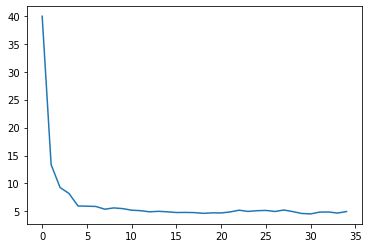

In [83]:
plot(history)

## Early Stopping

In [84]:
from tensorflow.keras.callbacks import EarlyStopping
earlystopping = EarlyStopping(min_delta=0.001, patience=5, restore_best_weights=True)

In [85]:
model.compile(loss='mae', optimizer='adam')

In [86]:
history2 = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                     epochs=40, batch_size=256, callbacks=[earlystopping], verbose=False)

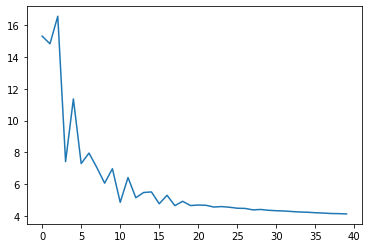

In [87]:
plot(history2)

## Dropout and Batch Normalization Layers

In [88]:
from tensorflow.keras.layers import Dropout, BatchNormalization

model = Sequential()
model.add(BatchNormalization(input_dim=13))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1))

In [89]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_2 (Batch (None, 13)                52        
_________________________________________________________________
dense_34 (Dense)             (None, 512)               7168      
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 512)               2048      
_________________________________________________________________
dense_35 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 1)                

In [90]:
model.compile(loss='mae', optimizer='adam')

In [91]:
history3 = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=120, batch_size=256, callbacks=[earlystopping], verbose=False)

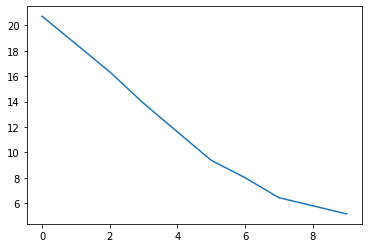

In [92]:
plot(history3)